In [21]:
import pandas as pd

# Load the datasets
file_paths = {
    "Sepsis_Activity_Flow": "Sepsis_Activity_Flow.csv",
    "Sepsis_Cases_Log": "Sepsis_Cases_Log.csv",
    "Sepsis_Diagnosis": "Sepsis_Diagnosis.csv",
    "Sepsis_Other_Attributes": "Sepsis_Other_Attributes.csv"
}

# Read the CSV files
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display basic information about the datasets
data_info = {name: df.info() for name, df in datasets.items()}
datasets_summary = {name: df.head() for name, df in datasets.items()}

# Display first few rows of each dataset
datasets_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case ID         1000 non-null   object 
 1   Activity 1      1000 non-null   object 
 2   Activity 2      1000 non-null   object 
 3   Activity 3      1000 non-null   object 
 4   Activity 4      1000 non-null   object 
 5   Activity 5      999 non-null    object 
 6   Activity 6      940 non-null    object 
 7   Activity 7      908 non-null    object 
 8   Activity 8      881 non-null    object 
 9   Activity 9      781 non-null    object 
 10  Activity 10     740 non-null    object 
 11  Activity 11     690 non-null    object 
 12  Activity 12     640 non-null    object 
 13  Activity 13     559 non-null    object 
 14  Activity 14     464 non-null    object 
 15  Activity 15     385 non-null    object 
 16  Activity 16     311 non-null    object 
 17  Activity 17     242 non-null    ob

{'Sepsis_Activity_Flow':   Case ID       Activity 1  Activity 2        Activity 3  Activity 4  \
 0       A  ER Registration  Leucocytes               CRP  LacticAcid   
 1       B  ER Registration   ER Triage               CRP  LacticAcid   
 2       C  ER Registration   ER Triage  ER Sepsis Triage  Leucocytes   
 3       D  ER Registration   ER Triage  ER Sepsis Triage         CRP   
 4       E  ER Registration   ER Triage  ER Sepsis Triage   IV Liquid   
 
    Activity 5        Activity 6      Activity 7      Activity 8    Activity 9  \
 0   ER Triage  ER Sepsis Triage       IV Liquid  IV Antibiotics  Admission NC   
 1  Leucocytes  ER Sepsis Triage       IV Liquid  IV Antibiotics  Admission NC   
 2         CRP         IV Liquid  IV Antibiotics    Admission NC  Admission NC   
 3  LacticAcid        Leucocytes       IV Liquid  IV Antibiotics  Admission NC   
 4         CRP        Leucocytes      LacticAcid  IV Antibiotics           NaN   
 
    ... Activity 42 Activity 43 Activity 4

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt



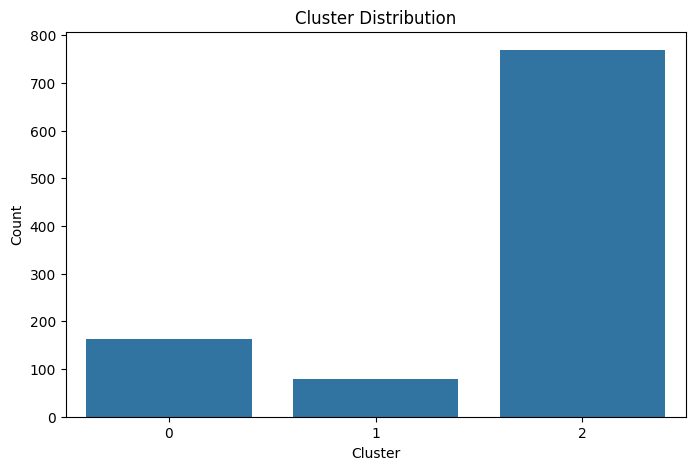

In [23]:
# Analyze the distribution of clusters in the dataset
df_clusters = datasets["Sepsis_Other_Attributes"]

# Plot cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_clusters["Cluster"])
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


In [26]:
import pandas as pd

# Load datasets (replace with actual file paths if needed)
df_cases_log = pd.read_csv("Sepsis_Cases_Log.csv")  # Ensure correct file name
df_diagnosis = pd.read_csv("Sepsis_Diagnosis.csv")

# Merge activity log with diagnostic values
df_relevant_values = df_cases_log.merge(df_diagnosis, on=["Case ID", "Activity"], how="left")

# Ensure relevant columns exist
if not all(col in df_relevant_values.columns for col in ["Activity", "Next Activity", "Leucocytes", "CRP", "LacticAcid"]):
    raise ValueError("One or more required columns are missing in df_relevant_values")


ValueError: One or more required columns are missing in df_relevant_values

In [27]:
print("Existing Columns in df_relevant_values:", df_relevant_values.columns.tolist())


Existing Columns in df_relevant_values: ['Case ID', 'Activity', 'Complete Timestamp', 'Variant', 'Variant index', 'lifecycle:transition', 'org:group', 'InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion', 'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid', 'Diagnose', 'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG', 'Leucocytes_x', 'CRP_x', 'LacticAcid_x', 'Leucocytes_y', 'CRP_y', 'LacticAcid_y']


: 

In [25]:
# Create a dataset with Activity, Next Activity, and corresponding test values
df_value_intervals = df_relevant_values[["Activity", "Next Activity", "Leucocytes", "CRP", "LacticAcid"]].dropna()

# Define function to group values into bins based on percentiles
def create_bins(df, column, num_bins=5):
    """
    Creates bins for a given column based on percentiles.
    """
    bins = np.percentile(df[column].dropna(), np.linspace(0, 100, num_bins + 1))
    labels = [f"{round(bins[i], 2)} - {round(bins[i+1], 2)}" for i in range(len(bins) - 1)]
    df[f"{column}_bin"] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
    return df

# Apply binning to Leucocytes, CRP, and LacticAcid
for column in ["Leucocytes", "CRP", "LacticAcid"]:
    df_value_intervals = create_bins(df_value_intervals, column)

# Drop original values, keeping only bins
df_value_intervals = df_value_intervals.drop(columns=["Leucocytes", "CRP", "LacticAcid"])

# Display the first few rows of the dataset
df_value_intervals.head()


KeyError: "['Next Activity', 'Leucocytes', 'CRP', 'LacticAcid'] not in index"

In [36]:
# 1. Analyze frequency distributions of transitions
df_transition_counts = df_value_intervals.groupby(["Activity", "Next Activity"]).size().reset_index(name="Count")

# Display frequency table
df_transition_counts.head()

,Activity,Next Activity,Count
0,CRP,Admission IC,83
1,CRP,Admission NC,450
2,CRP,CRP,2367
3,CRP,ER Registration,291
4,CRP,ER Sepsis Triage,31


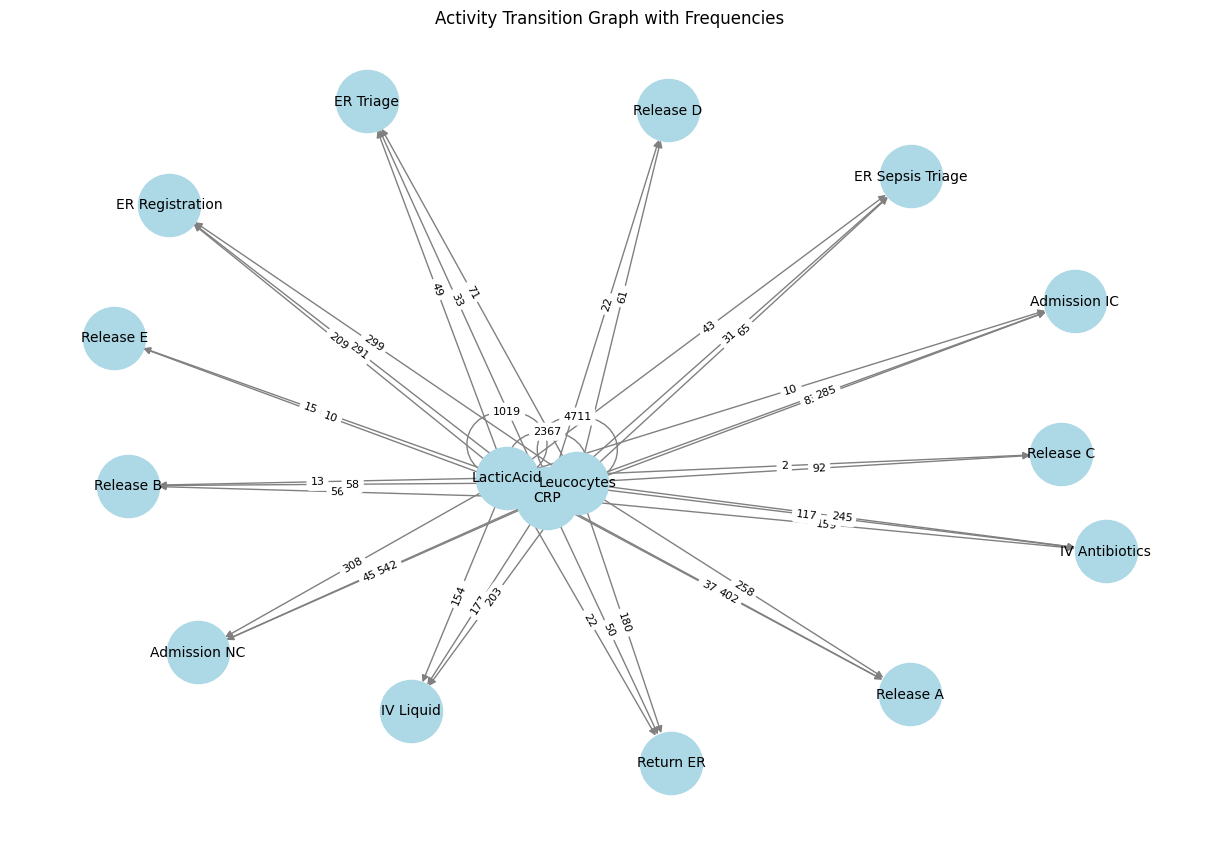

In [37]:
import networkx as nx

# Create a directed graph for visualization
G = nx.DiGraph()

# Add edges with weights based on frequency
for _, row in df_transition_counts.iterrows():
    G.add_edge(row["Activity"], row["Next Activity"], weight=row["Count"])

# Set up plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization

# Draw the graph
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)

# Add edge labels (weights)
edge_labels = {(u, v): d["weight"] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Activity Transition Graph with Frequencies")
plt.show()


In [38]:
# Group by activity and next activity to find the most common value bins
df_thresholds = df_value_intervals.groupby(["Activity", "Next Activity"]).agg(
    Leucocytes_bin_mode=("Leucocytes_bin", lambda x: x.mode()[0] if not x.mode().empty else None),
    CRP_bin_mode=("CRP_bin", lambda x: x.mode()[0] if not x.mode().empty else None),
    LacticAcid_bin_mode=("LacticAcid_bin", lambda x: x.mode()[0] if not x.mode().empty else None),
    Count=("Next Activity", "count")
).reset_index()

# Display results
df_thresholds.head()

,Activity,Next Activity,Leucocytes_bin_mode,CRP_bin_mode,LacticAcid_bin_mode,Count
0,CRP,Admission IC,10.7 - 13.5,150.0 - 573.0,0.2 - 0.8,83
1,CRP,Admission NC,0.2 - 8.4,150.0 - 573.0,1.3 - 2.3,450
2,CRP,CRP,8.4 - 9.0,150.0 - 573.0,0.8 - 1.1,2367
3,CRP,ER Registration,0.2 - 8.4,150.0 - 573.0,1.3 - 2.3,291
4,CRP,ER Sepsis Triage,0.2 - 8.4,150.0 - 573.0,1.3 - 2.3,31


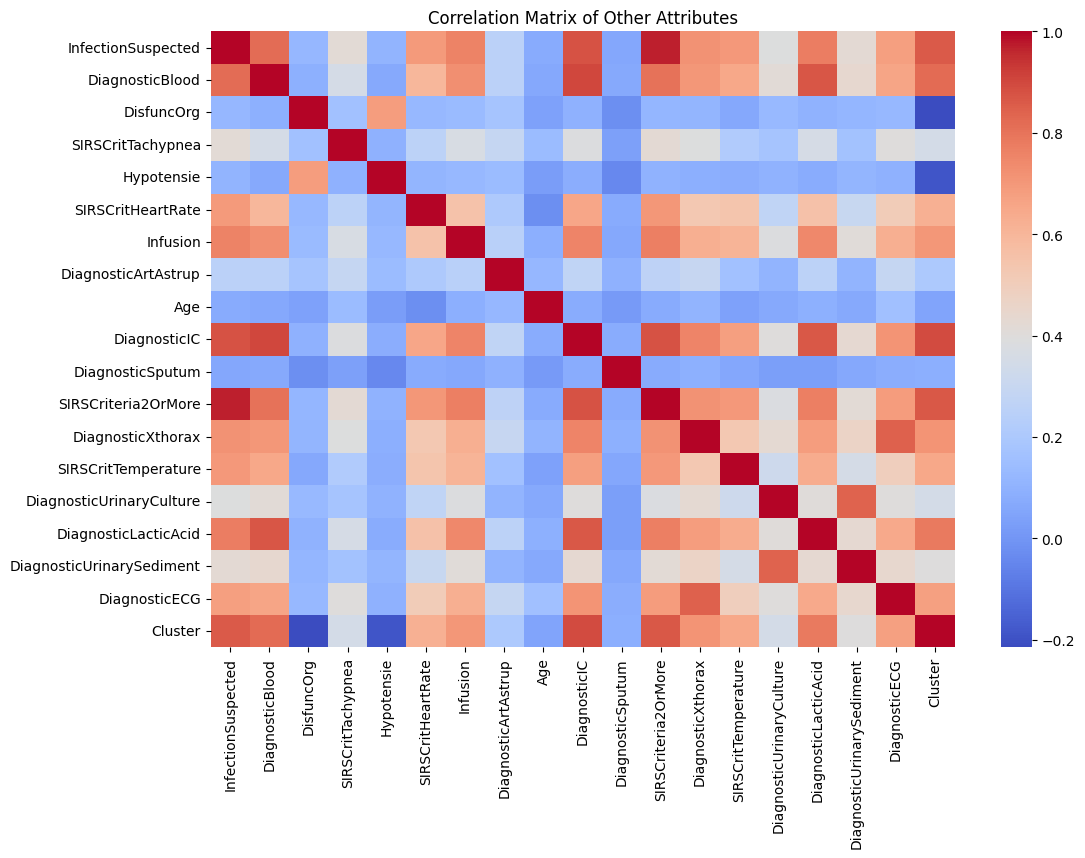

,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,DiagnosticSputum,SIRSCritTemperature
0,True,True,True,True,True,True,85.0,False,True
1,False,True,False,True,True,False,45.0,True,True
2,False,False,False,True,True,True,55.0,False,True
3,False,True,False,True,True,True,70.0,False,True
4,False,True,False,True,True,True,75.0,False,True


In [39]:
# Load the dataset for other attributes
df_other_attributes = datasets["Sepsis_Other_Attributes"]

# Drop non-informative columns (like Case ID, which is just an identifier)
df_other_attributes = df_other_attributes.drop(columns=["Case ID"])

# Check correlation between features to identify redundancy
correlation_matrix_other = df_other_attributes.corr()

# Plot heatmap to visualize feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_other, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Other Attributes")
plt.show()

# Identify highly correlated features (threshold > 0.8)
high_correlation_pairs = correlation_matrix_other[correlation_matrix_other.abs() > 0.8]
redundant_features = set()

for col in high_correlation_pairs.columns:
    correlated = high_correlation_pairs[col].dropna().index.tolist()
    if len(correlated) > 1:  # More than one feature correlated
        redundant_features.add(col)

# Drop redundant features
df_reduced_attributes = df_other_attributes.drop(columns=list(redundant_features))

# Display the reduced feature set
df_reduced_attributes.head()


In [40]:
pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Extract sequences from Sepsis_Activity_Flow dataset
df_sequences = datasets["Sepsis_Activity_Flow"].copy()

# Convert activity sequences into lists
activity_cols = [col for col in df_sequences.columns if "Activity" in col and col != "Final Activity"]
df_sequences["Activity_Sequence"] = df_sequences[activity_cols].values.tolist()

# Replace NaN values with empty strings in the sequences
df_sequences["Activity_Sequence"] = df_sequences["Activity_Sequence"].apply(lambda x: [act for act in x if isinstance(act, str)])

# Tokenize activity sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_sequences["Activity_Sequence"])
sequences_encoded = tokenizer.texts_to_sequences(df_sequences["Activity_Sequence"])

# Pad sequences to have uniform length
max_seq_length = max(len(seq) for seq in sequences_encoded)
X_sequences = pad_sequences(sequences_encoded, maxlen=max_seq_length, padding="post")

# Encode final activity as target labels
le_activities = LabelEncoder()
y_activities = le_activities.fit_transform(df_sequences["Final Activity"])

# Prepare additional attributes from reduced dataset
X_attributes = df_reduced_attributes.loc[df_sequences.index].values

# Combine sequence and attribute inputs
X_combined = np.hstack([X_sequences, X_attributes])

# Display processed training data
X_combined, y_activities


(array([[6, 1, 2, ..., 85.0, False, True],
        [6, 5, 2, ..., 45.0, True, True],
        [6, 5, 7, ..., 55.0, False, True],
        ...,
        [6, 5, 7, ..., 70.0, False, True],
        [6, 5, 7, ..., 45.0, False, True],
        [6, 5, 7, ..., 40.0, False, True]], dtype=object),
 array([ 8,  8,  8, 13,  4,  8,  8,  9,  8,  8, 13, 13,  8, 13,  7, 13,  9,
         9, 13,  8, 13,  5,  8,  4, 13,  7, 10, 13,  4,  8,  8,  4, 13,  8,
         1,  8,  6,  6, 11, 13,  8,  8,  8, 13,  6,  4,  4,  7,  8,  8,  4,
         6, 13,  8,  8,  4, 13,  9,  8,  8, 13, 13,  8, 13, 13,  0, 13,  7,
         9,  8, 13, 13,  1, 13, 13,  8,  8,  8,  1, 13, 13,  8, 13, 13,  5,
        13,  1,  8, 13,  6, 13,  7,  8, 13,  1,  4,  4, 13,  8,  4,  9,  7,
         6, 10,  6, 13, 13,  8, 13,  8,  7,  9,  4,  8,  9,  1,  8,  8,  4,
         8, 13, 13,  8,  7,  8, 13,  8,  8,  8, 13, 13,  9, 13,  7,  6, 13,
         4,  8,  2,  8,  8, 13,  1,  8,  9, 13, 13, 13,  2,  8,  4,  8,  8,
         4,  8,  1,  8,  8, 13

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


# Extract sequences from Sepsis_Activity_Flow dataset
df_sequences = datasets["Sepsis_Activity_Flow"].copy()
df_reduced_attributes = datasets["Sepsis_Other_Attributes"].drop(columns=["Case ID"])  # Remove identifier

# Convert activity sequences into lists, handling NaNs
activity_cols = [col for col in df_sequences.columns if "Activity" in col and col != "Final Activity"]
df_sequences["Activity_Sequence"] = df_sequences[activity_cols].apply(lambda row: [act for act in row if isinstance(act, str)], axis=1)

# Manually encode activities using LabelEncoder
activity_set = set(activity for seq in df_sequences["Activity_Sequence"] for activity in seq)
activity_encoder = {activity: idx for idx, activity in enumerate(activity_set, start=1)}

# Convert sequences into encoded numerical lists
sequences_encoded = [[activity_encoder[activity] for activity in seq] for seq in df_sequences["Activity_Sequence"]]

# Pad sequences for uniform length
max_seq_length = max(len(seq) for seq in sequences_encoded)
X_sequences_padded = np.array([seq + [0] * (max_seq_length - len(seq)) for seq in sequences_encoded])

# Encode final activity labels
le_activities = LabelEncoder()
y_activities = le_activities.fit_transform(df_sequences["Final Activity"])

# Prepare additional patient attributes
X_attributes = df_reduced_attributes.loc[df_sequences.index].values

# Convert categorical attributes to numeric
df_combined = pd.DataFrame(np.hstack([X_sequences_padded, X_attributes]))
df_combined_numeric = df_combined.apply(pd.to_numeric, errors='coerce')

# Handle missing values (fill NaNs with median values)
df_combined_cleaned = df_combined_numeric.fillna(df_combined_numeric.median())

# Convert cleaned DataFrame back to NumPy array
X_combined_cleaned = df_combined_cleaned.values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_cleaned, y_activities, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Ensure correct labels for evaluation
unique_classes_test = np.unique(y_test)
present_labels = [le_activities.classes_[i] for i in unique_classes_test]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=present_labels)

# Display final results
print(f"Model Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", report_rf)


Model Accuracy: 0.6600
Classification Report:
                   precision    recall  f1-score   support

    Admission NC       0.00      0.00      0.00         4
             CRP       0.81      0.87      0.84        15
ER Sepsis Triage       1.00      0.60      0.75         5
  IV Antibiotics       0.48      0.92      0.63        13
       IV Liquid       0.00      0.00      0.00         3
      LacticAcid       0.75      0.50      0.60         6
      Leucocytes       0.82      0.69      0.75        13
       Release A       0.65      0.88      0.74        73
       Release B       0.00      0.00      0.00        12
       Release C       0.00      0.00      0.00         5
       Release D       0.00      0.00      0.00         2
       Return ER       0.67      0.57      0.62        49

        accuracy                           0.66       200
       macro avg       0.43      0.42      0.41       200
    weighted avg       0.59      0.66      0.61       200



f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [44]:
import numpy as np

# Function to preprocess input sequence
def encode_sequence(user_sequence, activity_encoder, max_seq_length):
    """ Encodes and pads the user input sequence to match model input format. """
    encoded_seq = [activity_encoder.get(activity, 0) for activity in user_sequence]
    padded_seq = encoded_seq + [0] * (max_seq_length - len(encoded_seq))
    return np.array(padded_seq).reshape(1, -1)

# Function to handle test values from user input
def extract_test_values(user_sequence):
    """ Extracts Leucocytes, CRP, and LacticAcid values if present in input. """
    leucocytes, crp, lactic_acid = np.nan, np.nan, np.nan
    for activity in user_sequence:
        if "Leucocytes(" in activity:
            leucocytes = float(activity.split("(")[-1].strip(")"))
        elif "CRP(" in activity:
            crp = float(activity.split("(")[-1].strip(")"))
        elif "LacticAcid(" in activity:
            lactic_acid = float(activity.split("(")[-1].strip(")"))
    return leucocytes, crp, lactic_acid

# Function to take user input and make a prediction
def predict_next_activity():
    """ Takes user input, processes it, and predicts the next activity. """
    
    # Step 1: Get user input sequence
    print("\nEnter the sequence of activities (comma-separated, e.g., 'ER Registration, ER Triage, CRP(160)'):")
    user_sequence = input().split(", ")
    
    # Step 2: Get user input for patient attributes
    print("\nEnter the following patient attributes (True/False for boolean values, Age as a number):")
    patient_attributes = []
    for attr in df_reduced_attributes.columns:
        value = input(f"{attr}: ")
        if value.lower() in ["true", "false"]:
            patient_attributes.append(1 if value.lower() == "true" else 0)
        else:
            patient_attributes.append(float(value))  # Convert numerical values
    
    # Step 3: Extract test values if present
    leucocytes, crp, lactic_acid = extract_test_values(user_sequence)
    
    # Step 4: Encode sequence and format input
    encoded_seq = encode_sequence(user_sequence, activity_encoder, max_seq_length)
    
    # Step 5: Combine sequence, patient attributes, and test values
    user_input = np.hstack([encoded_seq, patient_attributes, [leucocytes, crp, lactic_acid]])
    
    # Step 6: Handle missing values (replace NaNs with median values)
    user_input = np.nan_to_num(user_input, nan=np.nanmedian(X_combined_cleaned))
    
    # Step 7: Predict the next activity
    predicted_index = rf_model.predict(user_input.reshape(1, -1))[0]
    predicted_activity = le_activities.inverse_transform([predicted_index])[0]
    
    print(f"\nPredicted Next Activity: **{predicted_activity}**")

# Run the interactive prediction
predict_next_activity()



Enter the sequence of activities (comma-separated, e.g., 'ER Registration, ER Triage, CRP(160)'):

Enter the following patient attributes (True/False for boolean values, Age as a number):


ValueError: could not convert string to float: ''

In [45]:
import pickle
import json
import numpy as np

# Define file paths
model_filename = "sepsis_activity_model.pkl"
columns_filename = "columns.json"

# Save trained Random Forest model
with open(model_filename, "wb") as f:
    pickle.dump(rf_model, f)

# Save column information for later use in web app
column_data = {
    "data_columns": list(df_combined_cleaned.columns),  # Feature names
    "max_seq_length": max_seq_length,  # Sequence padding length
    "activity_encoder": activity_encoder,  # Activity encoding dictionary
    "label_classes": le_activities.classes_.tolist()  # Mapping of labels
}

with open(columns_filename, "w") as f:
    json.dump(column_data, f)

print(f"Model saved as {model_filename}")
print(f"Column information saved as {columns_filename}")


Model saved as sepsis_activity_model.pkl
Column information saved as columns.json


: 

In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
